In [ ]:
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import matplotlib.pyplot as plot
import cv2
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import os

In [2]:
def get_images(directory):
    Images = []
    Labels = []
    for labels in os.listdir(directory):
        #print(labels)
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        else:
            print('No folder here')
        for image_file in os.listdir(directory + labels):
            #print(len(os.listdir(directory + labels)))
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
        #print(label)
    return shuffle(Images,Labels,random_state = 22)
    
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [15]:
def test_image(directory):
    Images = []
    for image_file in os.listdir(directory):
        image = cv2.imread(directory+r'/'+image_file)
        image = cv2.resize(image,(150,150))
        Images.append(image)
    return Images

In [4]:
path = '/Users/georgeboben/Desktop/Image Classification/intel-image-classification/seg_train/'
Images, Labels = get_images(path) #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


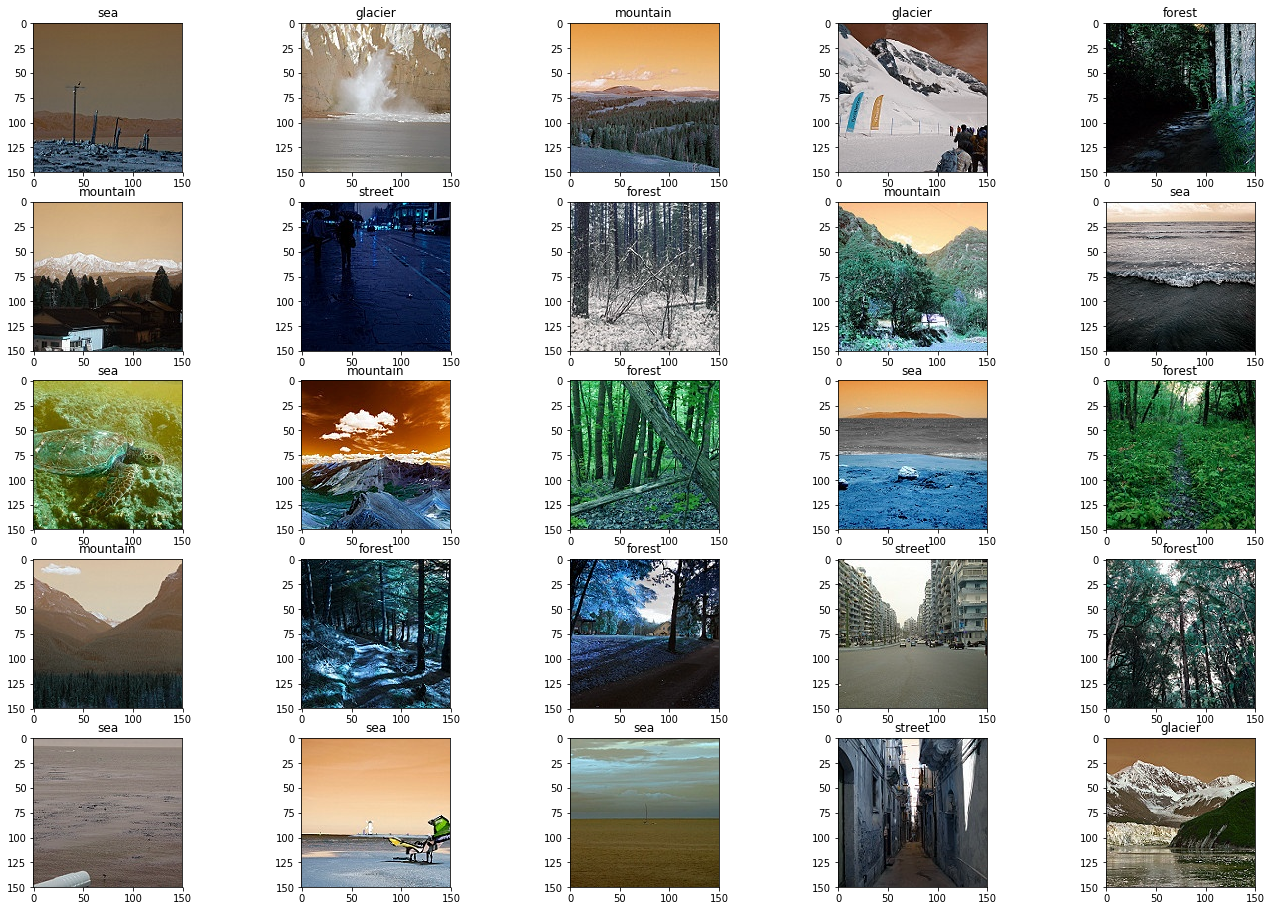

In [6]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [7]:
model = Models.Sequential()

model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
#model.add(Layers.Conv2D(150,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(Layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(64,activation='relu'))
model.add(Layers.Dense(32,activation='relu'))
#model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.3))
model.add(Layers.Dense(6,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
'''SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
__________

"SVG(model_to_dot(model).create(prog='dot', format='svg'))\nUtils.plot_model(model,to_file='model.png',show_shapes=True)"

In [9]:
training = model.fit(Images,Labels,epochs = 35,validation_split = 0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 393s 40ms/sample - loss: 2.1563 - acc: 0.1733 - val_loss: 1.6037 - val_acc: 0.2990
Epoch 2/35
9823/9823 [==============================] - 403s 41ms/sample - loss: 1.6248 - acc: 0.3286 - val_loss: 1.4611 - val_acc: 0.4742
Epoch 3/35
9823/9823 [==============================] - 413s 42ms/sample - loss: 1.4872 - acc: 0.4113 - val_loss: 1.3506 - val_acc: 0.4989
Epoch 4/35
9823/9823 [==============================] - 434s 44ms/sample - loss: 1.3773 - acc: 0.4402 - val_loss: 1.2759 - val_acc: 0.5156
Epoch 5/35
9823/9823 [==============================] - 426s 43ms/sample - loss: 1.3166 - acc: 0.4710 - val_loss: 1.2090 - val_acc: 0.5991
Epoch 6/35
9823/9823 [==============================] - 407s 41ms/sample - loss: 1.2409 - acc: 0.5333 - val_loss: 1.1485 - val_acc: 0.5982
Epoch 7/35
9823/9823 [==============================] - 484s 49ms/sample - loss: 1.1588 - acc: 0.5682 - val_loss: 1.03

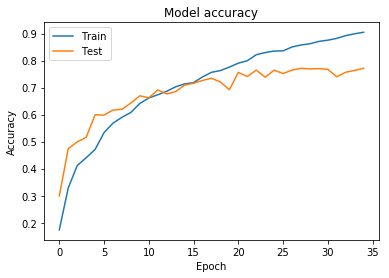

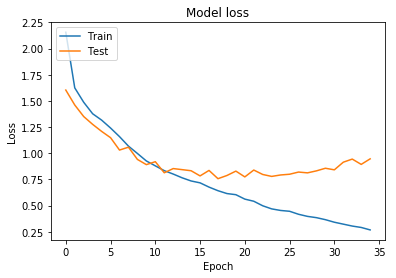

In [10]:
plot.plot(training.history['acc'])
plot.plot(training.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc = 'upper left')
plot.show()

plot.plot(training.history['loss'])
plot.plot(training.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc = 'upper left')
plot.show()

In [11]:
test_images,test_labels = get_images('seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 34s 11ms/sample - loss: 0.9676 - acc: 0.7730


[0.9675796647071838, 0.773]

In [16]:
pred_images = test_image('seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


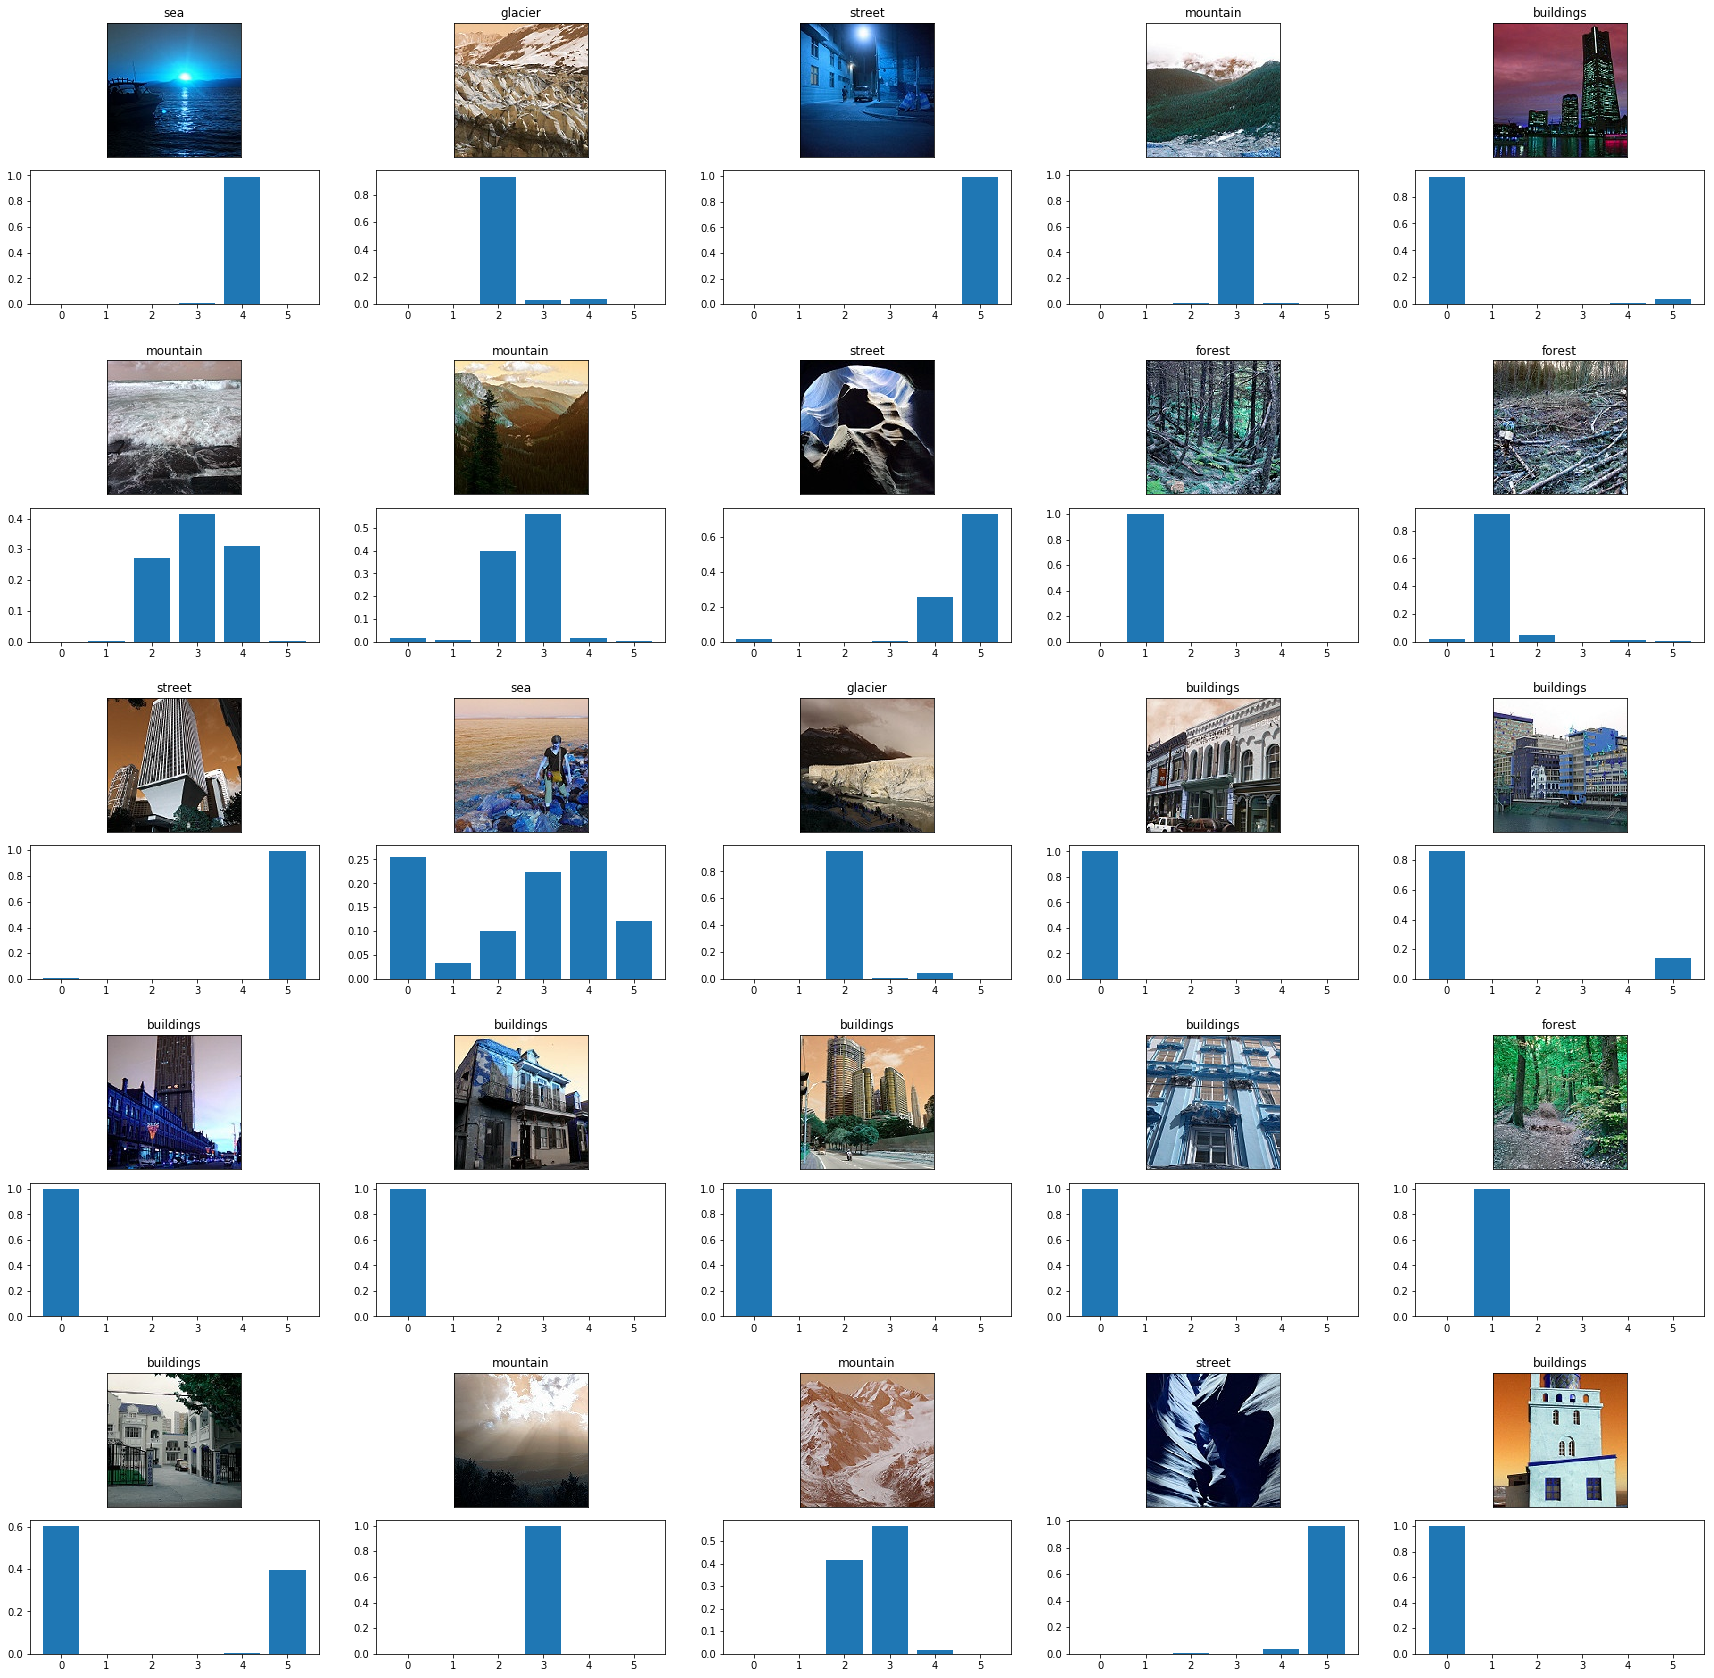

In [17]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()